In [62]:
import sys 
sys.path.insert(1, "../")
from workloads.util import use_plots, use_results

import seaborn as sns 
from matplotlib import pyplot as plt
sns.set()

import pandas as pd
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
sns.set_theme(style="whitegrid")
sns.set_theme(style="whitegrid", font_scale=1.7)
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

In [64]:
policy_map = {
    'total_error': 'Regret-Proportional',
    'total_error_cold': 'Regret-Proportional',
    'min_past': 'Minimum-Past', 
    'round_robin': "Round-Robin", 
    'max_pending': "Maximum-Pending", 
    'last_query': "Read-Optimized", 
    "query_proportional": "Query-Proportional",
    "batch": "Batched", 
    'random': "Random"
}
hue_order = ['Regret-Proportional', "Query-Proportional", 'Minimum-Past', "Maximum-Pending", "Round-Robin", "Random", "Batched", "Best-Case"]

In [65]:
def hex_to_rgb(hex):
  rgb = []
  for i in (0, 2, 4):
    decimal = int(hex[i:i+2], 16)
    rgb.append(decimal/256)
  
  return tuple(rgb)


colors = sns.color_palette(as_cmap=True)
#colors_hex = ["d0e2ff", "4589ff", "a8a8a8", "8d8d8d", "6f6f6f", "525252", "393939"]
colors_hex = ["24a148", "ff832b", "002d9c", "0f62fe", "8d8d8d", "a6c8ff", "d0e2ff", "8d8d8d"]
colors = [hex_to_rgb(c) for c in colors_hex]
hue_colors = {hue_order[i]: colors[i] for i in range(len(hue_order))}
hue_colors

{'Regret-Proportional': (0.140625, 0.62890625, 0.28125),
 'Query-Proportional': (0.99609375, 0.51171875, 0.16796875),
 'Minimum-Past': (0.0, 0.17578125, 0.609375),
 'Maximum-Pending': (0.05859375, 0.3828125, 0.9921875),
 'Round-Robin': (0.55078125, 0.55078125, 0.55078125),
 'Random': (0.6484375, 0.78125, 0.99609375),
 'Batched': (0.8125, 0.8828125, 0.99609375),
 'Best-Case': (0.55078125, 0.55078125, 0.55078125)}

## STL Results (yahoo)

In [58]:
plots_dir = use_plots("yahoo_a1", download=False)
stl_df = pd.read_csv(f"{plots_dir}/results.csv")
stl_updates_df = pd.read_csv(f"{plots_dir}/updates.csv")
stl_df["error"] = stl_df["total_error"] 
stl_df["updates"] = stl_df["runtime"].apply(lambda r: int(24/r) if r > 0 else "infinity")
stl_updates_df["updates"] = stl_updates_df["runtime"].apply(lambda r: int(24/r) if r > 0 else "infinity")
# add minimum past and max pending as equivalent to round robin
for eq_policy in ["min_past", "max_pending", "query_proportional"]: 
    policy_df = pd.DataFrame(stl_df[stl_df["policy"] == "round_robin"]) 
    policy_df["policy"] = eq_policy
    stl_df = pd.concat([stl_df, policy_df])
stl_df["workload"] = "Anomaly Detection"
stl_df.policy = stl_df.policy.map(policy_map)
stl_updates_df.policy = stl_updates_df.policy.map(policy_map)


stl_baseline_df = pd.read_csv(f"{plots_dir}/baseline.csv")
stl_upper_bound = stl_baseline_df[stl_baseline_df["policy"] == "All"].total_error.iloc[0]
stl_upper_bound_updates = stl_baseline_df[stl_baseline_df["policy"] == "All"].total_updates.iloc[0]
stl_lower_bound = stl_baseline_df[stl_baseline_df["policy"] == "None"].total_error.iloc[0]
stl_lower_bound_updates = stl_baseline_df[stl_baseline_df["policy"] == "None"].total_updates.iloc[0]

stl_df["error_increase"] = stl_df["error"] - stl_upper_bound

stl_baseline_df

{'results_dir': '/data/wooders/ralf-vldb/results', 'dataset_dir': '/data/wooders/ralf-vldb/datasets', 'plots_dir': '/data/wooders/ralf-vldb/plots', 'aws_dir': 'vldb', 'credentials': '/home/eecs/wooders/experiments/ralf-vldb.json'}


,Unnamed: 0,Unnamed: 0.1,runtime,policy,total_error,average_staleness,total_updates
0,0,0,0,All,90.793787,0.998466,43684
1,0,0,1000000,None,880.302334,325.500000,1


## ALS Results 

Run `workloads/recsys/aggregate_results.py` beforehand.

In [98]:
plots_dir = use_plots("ml-1m-dist", download=False)
als_df = pd.read_csv(f"{plots_dir}/results.csv")
als_updates_df = pd.read_csv(f"{plots_dir}/updates.csv")
als_df["workload"] = "Recommendation"
als_df.policy = als_df.policy.map(policy_map)

#als_baseline_df = pd.read_csv(f"{plots_dir}/baseline.csv")
#als_upper_bound = als_baseline_df[als_baseline_df["updates"] == 10000].error.iloc[0]
#als_upper_bound_updates = als_baseline_df[als_baseline_df["updates"] == 10000].total_updates.iloc[0]
#als_lower_bound = als_baseline_df[als_baseline_df["updates"] == 0].error.iloc[0]
#als_lower_bound_updates = als_baseline_df[als_baseline_df["updates"] == 0].total_updates.iloc[0]

#als_df["error_increase"] = als_df["error"] - als_upper_bound

{'results_dir': '/data/wooders/ralf-vldb/results', 'dataset_dir': '/data/wooders/ralf-vldb/datasets', 'plots_dir': '/data/wooders/ralf-vldb/plots', 'aws_dir': 'vldb', 'credentials': '/home/eecs/wooders/experiments/ralf-vldb.json'}


/data/wooders/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [99]:
df

,slide,key,output_ts,curr_ts,staleness
0,1,4,21300,1970-01-01 00:00:30.300,9000
1,1,6,21300,1970-01-01 00:00:30.300,9000
2,1,17,21300,1970-01-01 00:00:30.300,9000
3,1,19,21300,1970-01-01 00:00:30.300,9000
4,1,25,21300,1970-01-01 00:00:30.300,9000
...,...,...,...,...,...
8906,72,60,2575800,1970-01-01 00:43:02.700,6900
8907,72,81,2574600,1970-01-01 00:43:02.700,8100
8908,72,96,2574000,1970-01-01 00:43:02.700,8700
8909,72,61,2581200,1970-01-01 00:43:06.600,5400


# Plot 

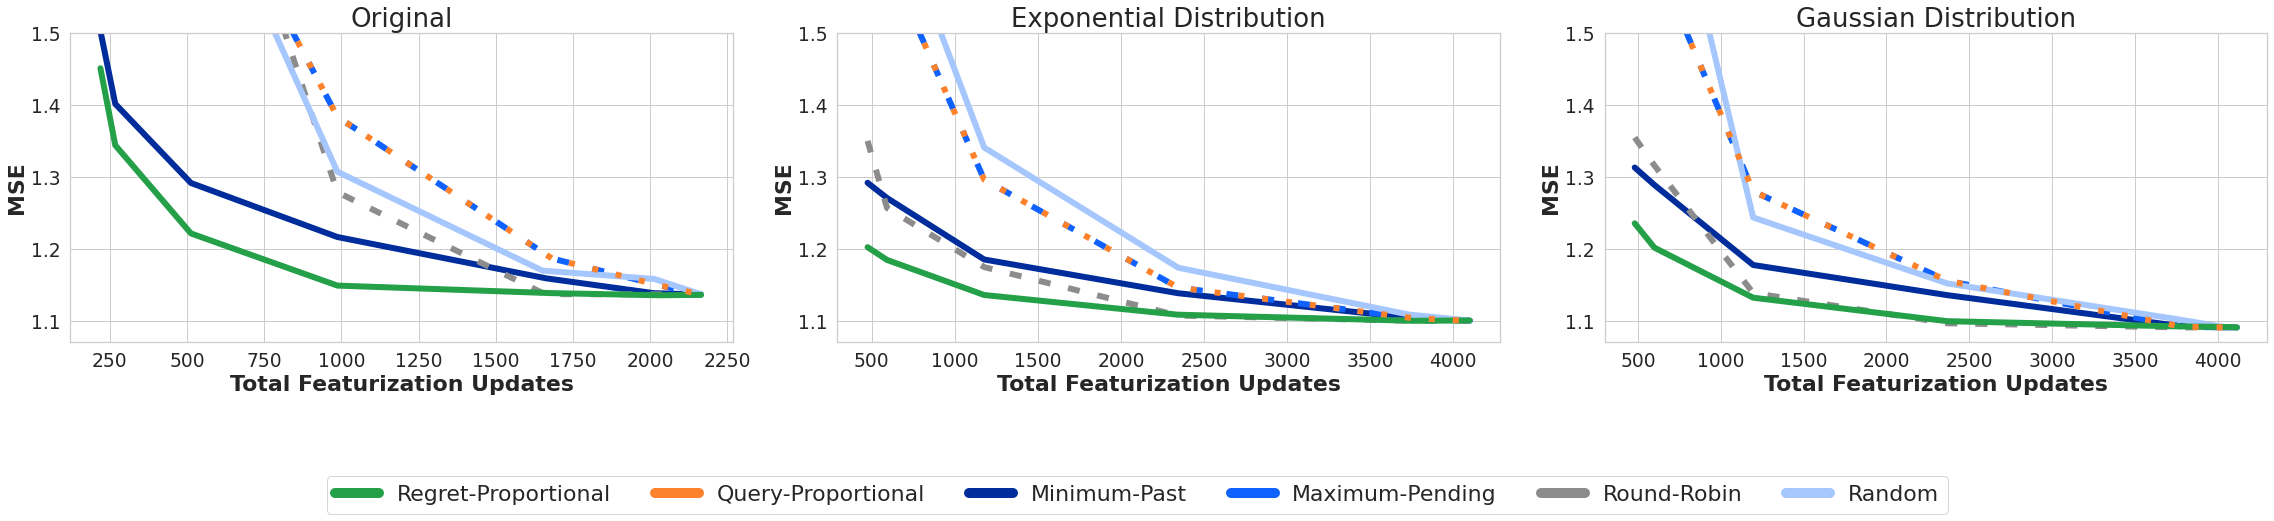

In [107]:
fig, axes = plt.subplots(1, 3, figsize=(32,6))
linewidth = 6


line_hue_order = ['Minimum-Past', "Maximum-Pending", "Round-Robin", "Random", 'Regret-Proportional', "Query-Proportional"]


# ALS plots 

updates = [0.5, 0.25, 0.2, 1, 2, 3, 4] #1, 2, 3, 4, 5, 8]
dists = [None, "exponential", "gaussian"]
for dist in dists: 
    
    i = dists.index(dist)
    
    if dist is None: 
        df = als_df[als_df["dist"].isna()]
    else: 
        df = als_df[als_df["dist"] == dist]
        
    g = sns.lineplot(data=df[df.updates.isin(updates)], x="total_updates", y="error", hue="policy", ax=axes[i], palette=hue_colors, linewidth=linewidth, hue_order=line_hue_order)
    if dist is None: 
        axes[i].set_title(f"Original", fontsize=26)
    else: 
        axes[i].set_title(f"{dist.capitalize()} Distribution", fontsize=26)
        
    axes[i].set(xlabel="Total Featurization Updates",  ylabel="MSE", ylim=(1.07, 1.5))
    axes[i].set_xlabel("Total Featurization Updates", fontsize=22, fontweight="bold")
    axes[i].set_ylabel("MSE", fontsize=22, fontweight="bold")

    #g0.axline((5000, als_upper_bound), (1, als_upper_bound), color='grey') #, linestyle="--")
    #g0.axline((5000, als_lower_bound), (1, als_lower_bound), color='black', linestyle="--")
    g.legend_.remove()


handles, labels = axes[0].get_legend_handles_labels()
order = [labels.index(hue_order[labels.index(l)]) for l in labels]
leg = fig.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=22, loc="lower center", ncol=len(labels), bbox_to_anchor=(0.5, -0.25))

# set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(10.0)
   
for i in range(len(line_hue_order)):
    if line_hue_order[i] == "Round-Robin":
        for d in range(len(dists)):
            axes[d].lines[i].set_dashes((2, 3))
    if line_hue_order[i] == "Query-Proportional": 
        for d in range(len(dists)):
            axes[d].lines[i].set_dashes((1, 3))
    if line_hue_order[i] == "Maximum-Pending": 
        for d in range(len(dists)):
            axes[d].lines[i].set_dashes((2, 4))
    
    #axes[1].lines[i].set_alpha(0.6)
    
#fig.legend(handles, labels, bbox_to_anchor=(1.2, 0.8))
#fig.legend(handles, labels, bbox_to_anchor=(1.15, 0.8))
#fig.legend(handles, labels, loc="lower center", ncol=len(labels), bbox_to_anchor=(0.5, 1))
fig.tight_layout()

fig.savefig(f'{plots_dir}/als_dist.pdf', dpi=300, bbox_inches = "tight")

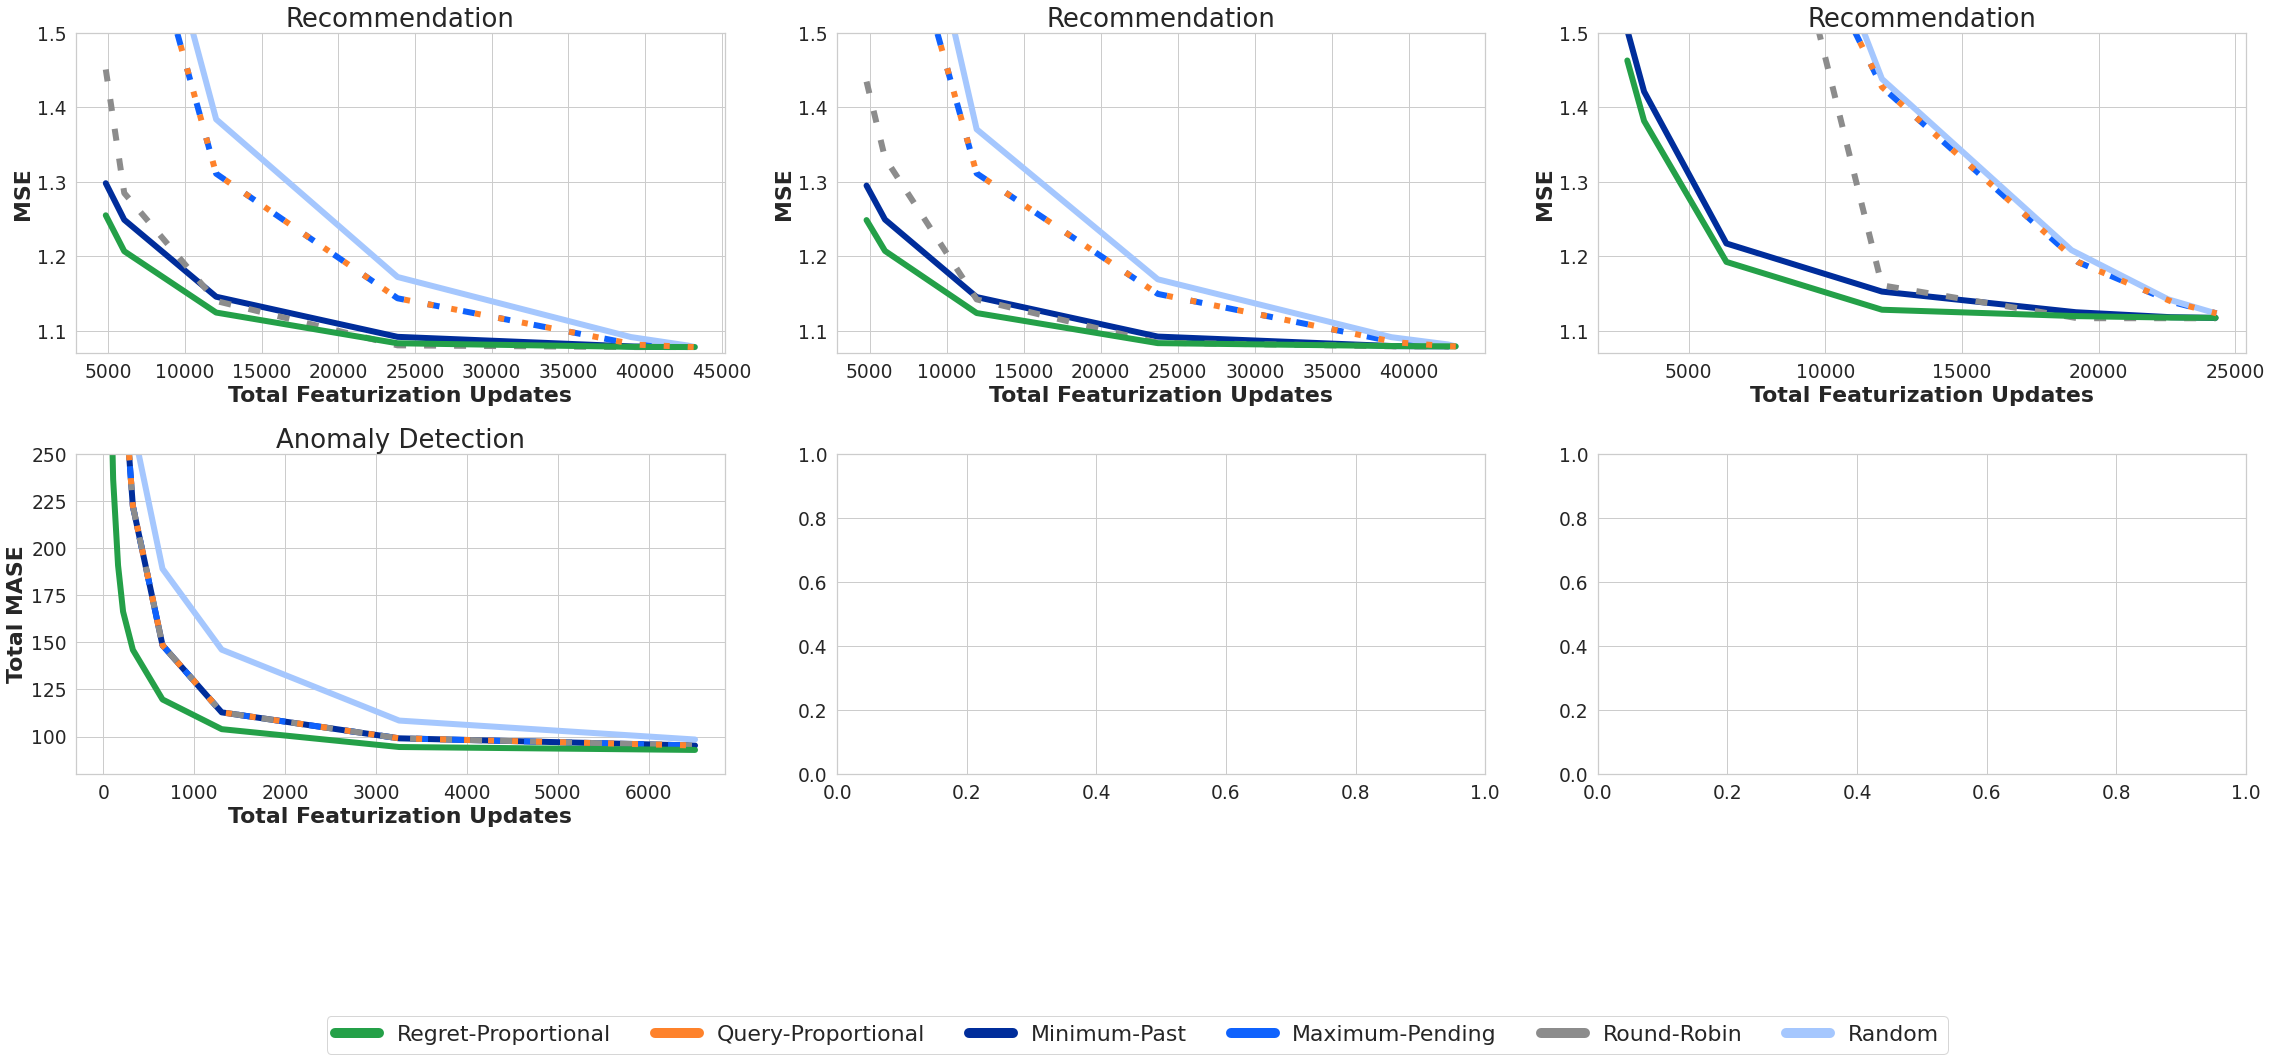

In [34]:
fig, axes = plt.subplots(2, 3, figsize=(32,12))
linewidth = 6


line_hue_order = ['Minimum-Past', "Maximum-Pending", "Round-Robin", "Random", 'Regret-Proportional', "Query-Proportional"]


# ALS plots 

updates = [0.5, 0.25, 0.2, 1, 2, 3, 4] #1, 2, 3, 4, 5, 8]
dists = ["exponential", "gaussian", None]
for dist in dists: 
    
    i = dists.index(dist)
    
    if dist is None: 
        df = als_df[als_df["dist"].isna()]
    else: 
        df = als_df[als_df["dist"] == dist]
        
    g = sns.lineplot(data=df[df.updates.isin(updates)], x="total_updates", y="error", hue="policy", ax=axes[0][i], palette=hue_colors, linewidth=linewidth, hue_order=line_hue_order)
    axes[0][i].set(title="Recommendation", xlabel="Total Featurization Updates",  ylabel="MSE", ylim=(1.07, 1.5))
    axes[0][i].set_xlabel("Total Featurization Updates", fontsize=22, fontweight="bold")
    axes[0][i].set_ylabel("MSE", fontsize=22, fontweight="bold")
    axes[0][i].set_title("Recommendation", fontsize=26)
    #g0.axline((5000, als_upper_bound), (1, als_upper_bound), color='grey') #, linestyle="--")
    #g0.axline((5000, als_lower_bound), (1, als_lower_bound), color='black', linestyle="--")
    g.legend_.remove()


# STL plots 

updates = [1, 2, 3, 4, 6, 8, 12, 24, 48, 120, 240]
g1 = sns.lineplot(data=stl_df[stl_df.updates.isin(updates)].reset_index(), x="total_updates", y="error", hue="policy", ax=axes[1][0], palette=hue_colors, linewidth=linewidth, hue_order=line_hue_order)
axes[1][0].set(title="Anomaly Detection", xlabel="Total Featurization Updates",  ylabel="Total MASE", ylim=(80, 250))
axes[1][0].set_xlabel("Total Featurization Updates", fontsize=22, fontweight="bold")
axes[1][0].set_ylabel("Total MASE", fontsize=22, fontweight="bold")
axes[1][0].set_title("Anomaly Detection", fontsize=26)
#g1.axline((0, stl_upper_bound), (0.1, stl_upper_bound), color='grey') #, linestyle="--")
#g1.axline((0, stl_lower_bound), (0.1, stl_lower_bound), color='grey') #, linestyle="--")
g1.legend_.remove()


handles, labels = axes[1][0].get_legend_handles_labels()
order = [labels.index(hue_order[labels.index(l)]) for l in labels]
leg = fig.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=22, loc="lower center", ncol=len(labels), bbox_to_anchor=(0.5, -0.25))

# set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(10.0)
   
for i in range(len(line_hue_order)):
    if line_hue_order[i] == "Round-Robin":
        for d in range(len(dists)):
            axes[0][d].lines[i].set_dashes((2, 3))
        axes[1][0].lines[i].set_dashes((2, 3))
    if line_hue_order[i] == "Query-Proportional": 
        for d in range(len(dists)):
            axes[0][d].lines[i].set_dashes((1, 3))
        axes[1][0].lines[i].set_dashes((1, 3))
    if line_hue_order[i] == "Maximum-Pending": 
        for d in range(len(dists)):
            axes[0][d].lines[i].set_dashes((2, 4))
        axes[1][0].lines[i].set_dashes((2, 4))
    #if line_hue_order[i] == "Minimum-Past": 
    #    axes[0].lines[i].set_dashes((3, 6))
     #   axes[1].lines[i].set_dashes((3, 6))
    
    #axes[1].lines[i].set_alpha(0.6)
    
#fig.legend(handles, labels, bbox_to_anchor=(1.2, 0.8))
#fig.legend(handles, labels, bbox_to_anchor=(1.15, 0.8))
#fig.legend(handles, labels, loc="lower center", ncol=len(labels), bbox_to_anchor=(0.5, 1))
fig.tight_layout()

#fig.savefig('../data/plots/line_all_no_ir.pdf', dpi=300, bbox_inches = "tight")

# Flink Comparison Results 

In [90]:
result_dir = use_results("azure/flink", download=False)

In [91]:
slide = [1, 24, 48, 72]
data = []
for s in slide:
    df = pd.read_csv(f"{result_dir}/results_{s}.csv") 
    df["slide"] = s
    data.append(df[["slide", "key", "output_ts", "curr_ts", "staleness"]])
    
df = pd.concat(data)
df

,slide,key,output_ts,curr_ts,staleness
0,1,4,21300,30300,9000
1,1,6,21300,30300,9000
2,1,17,21300,30300,9000
3,1,19,21300,30300,9000
4,1,25,21300,30300,9000
...,...,...,...,...,...
8906,72,60,2575800,2582700,6900
8907,72,81,2574600,2582700,8100
8908,72,96,2574000,2582700,8700
8909,72,61,2581200,2586600,5400


<AxesSubplot:xlabel='slide'>

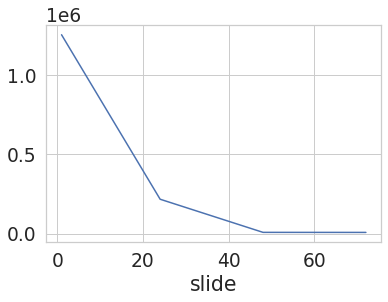

In [86]:
df.groupby("slide").staleness.mean().plot()

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'curr_ts' from milliseconds to seconds
df['curr_ts'] = df['curr_ts'] / 1000

# Convert the 'curr_ts' column to a datetime object
df['curr_ts'] = pd.to_datetime(df['curr_ts'], unit='s')

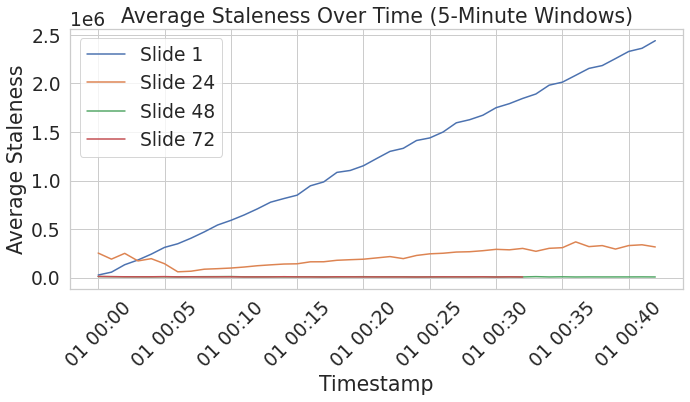

In [97]:
# Group the DataFrame by 'slide' and resample it over 5-minute windows, calculating the mean 'staleness' within each window
result_df = df.groupby('slide').resample('1T', on='curr_ts')['staleness'].mean().reset_index()

# Plot the results for each slide
fig = plt.figure(figsize=(10, 6))
for slide in result_df['slide'].unique():
    slide_data = result_df[result_df['slide'] == slide]
    plt.plot(slide_data['curr_ts'], slide_data['staleness'], label=f'Slide {slide}')

    
# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

plt.xlabel('Timestamp')
plt.ylabel('Average Staleness')
plt.title('Average Staleness Over Time (5-Minute Windows)')
plt.legend()
plt.grid(True)
fig.tight_layout()
plt.show()